In [3]:
import sys 
sys.path.append("D:\\GitHub\\Clone\\planning\\ruixuan")
from turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time

D:\Anaconda\lib\site-packages\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  "Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows."


In [9]:
# set env variable for data
os.environ["L5KIT_DATA_FOLDER"] = "C:\\Users\\zheng\\Desktop\\UMich\\Independent Study\\prediction-dataset"
# get config
cfg = load_config_data("C:\\Users\\zheng\\Desktop\\UMich\\Independent Study\\Codes\\python codes\\visualisation_config.yaml")
print(cfg)

dm = LocalDataManager()
dataset_path = dm.require(cfg["val_data_loader"]["key"])
zarr_dataset = ChunkedDataset(dataset_path)
zarr_dataset.open()
print(zarr_dataset)

rast = build_rasterizer(cfg, dm)
ego_dataset = EgoDataset(cfg, zarr_dataset, rast)
# agent_dataset = AgentDataset(cfg, zarr_dataset, rast)
# Obatin the information from semantic map

semantic_map_filepath = dm.require(cfg["raster_params"]["semantic_map_key"])
dataset_meta = _load_metadata(cfg["raster_params"]["dataset_meta_key"], dm)
world_to_ecef = np.array(dataset_meta["world_to_ecef"], dtype=np.float64)
Map_Api = MapAPI(semantic_map_filepath, world_to_ecef)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet50', 'history_num_frames': 0, 'future_num_frames': 50, 'step_time': 0.1}, 'raster_params': {'raster_size': [300, 300], 'pixel_size': [0.5, 0.5], 'ego_center': [0.6, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5, 'disable_traffic_light_faces': False, 'set_origin_to_bottom': True}, 'val_data_loader': {'key': 'scenes/train.zarr', 'batch_size': 12, 'shuffle': False, 'num_workers': 16}}
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+------

In [87]:
junction_lane_merge = np.load('scene_index(lane_merge)_Pedestrian.npy',allow_pickle = True)

In [88]:
AV_state = {}
for scene in junction_lane_merge:
    AV_state[scene] = {}
    frame_interval = zarr_dataset.scenes[scene]['frame_index_interval']
    data = zarr_dataset.frames[frame_interval[0]:frame_interval[1]-1]
    AV_state[scene]['translation'] = data['ego_translation'][:,:2]
    time_step = data['timestamp']
    time_diff = np.diff(time_step)[:,None]/1e9
    AV_state[scene]['velocity'] = np.diff(AV_state[scene]['translation'], axis=0)/time_diff
    AV_state[scene]['acceleration'] = np.diff(AV_state[scene]['velocity'], axis=0)/time_diff[1:]
    rotation = data['ego_rotation']
    AV_state[scene]['yaw'] = [rotation33_as_yaw(r) for r in rotation]

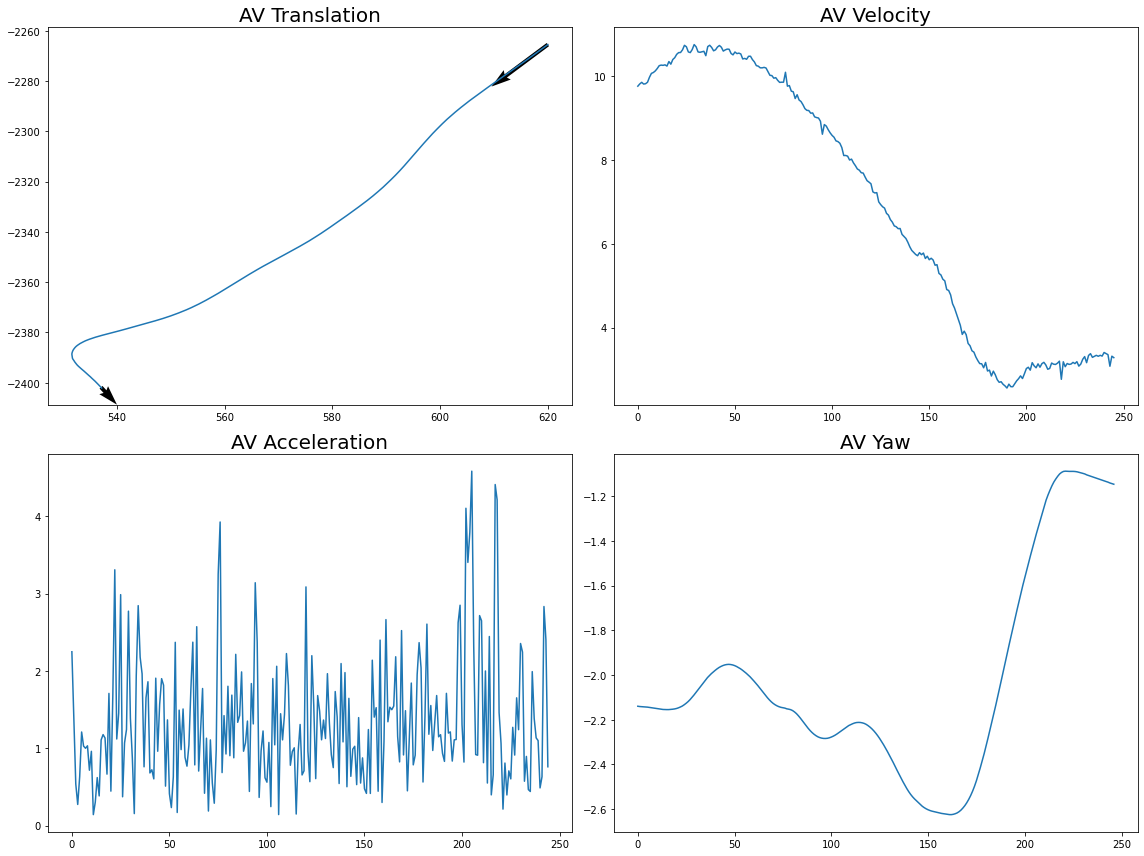

In [83]:
def AV_state_plot(data):

    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

    x = data['translation'][:,0]
    y = data['translation'][:,1]
    axes[0, 0].quiver(x[[0,-2]], y[[0,-2]], x[[1,-1]]-x[[0,-2]], y[[1,-1]]-y[[0,-2]], scale_units='inches', angles='xy', scale=1)
    axes[0, 0].plot(x, y)
    axes[0, 1].plot(range(data['velocity'].shape[0]), np.linalg.norm(data['velocity'],axis=1))
    axes[1, 0].plot(range(data['acceleration'].shape[0]), np.linalg.norm(data['acceleration'],axis=1))
    axes[1, 1].plot(range(len(data['yaw'])), data['yaw'])

    axes[0, 0].set_title("AV Translation", fontsize = 20)
    axes[0, 1].set_title("AV Velocity", fontsize = 20)
    axes[1, 0].set_title("AV Acceleration", fontsize = 20)
    axes[1, 1].set_title("AV Yaw", fontsize = 20)

    figure.tight_layout()
    
    
    
AV_state_plot(AV_state[82])

In [90]:
np.save('AV_state.npy', AV_state)

In [91]:
AV_state.kyes()

AttributeError: 'dict' object has no attribute 'kyes'

In [86]:
cd lane_merge

D:\GitHub\Clone\planning\ruixuan\target_scene_index\lane_merge
